Accuracy for AND gate  =  1.0


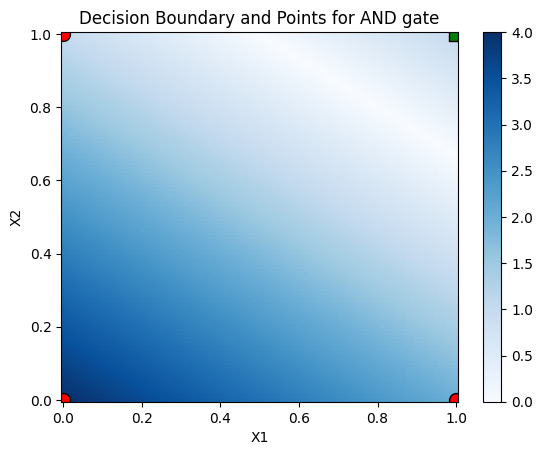

Accuracy for OR gate  =  1.0


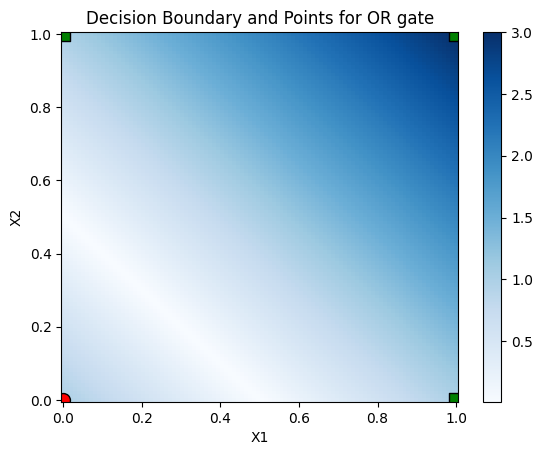

In [6]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

data = [[0,0], [0,1], [1,0], [1,1]]
gate_labels = {
    "AND gate": [0, 0, 0, 1],
    "OR gate": [0, 1, 1, 1]
}

x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)
point_grid = list(product(x_values, y_values))

for gate, labels in gate_labels.items():
    classifier = Perceptron(max_iter=40, random_state=22)
    classifier.fit(data, labels)

    abs_distances = abs(classifier.decision_function(point_grid))
    distances_matrix = np.reshape(abs_distances, (100, 100))

    print("Accuracy for", gate, " = ", classifier.score(data, labels))

    # Plot the heatmap
    heatmap = plt.pcolormesh(x_values, y_values, distances_matrix, cmap='Blues', shading='auto')
    plt.colorbar(heatmap)

    # Plot the data points with different markers for each class
    marker_map = {0: 'o', 1: 's'}  # Circle for class 0, square for class 1
    color_map = {0: 'red', 1: 'green'}

    for point, label in zip(data, labels):
        plt.scatter(point[0], point[1], marker=marker_map[label], color=color_map[label], edgecolor='black', s=100)

    plt.title(f"Decision Boundary and Points for {gate}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()